Pergunta 1: Como a inadimplência varia por classe de consumo nos anos de 2021 e 2022?


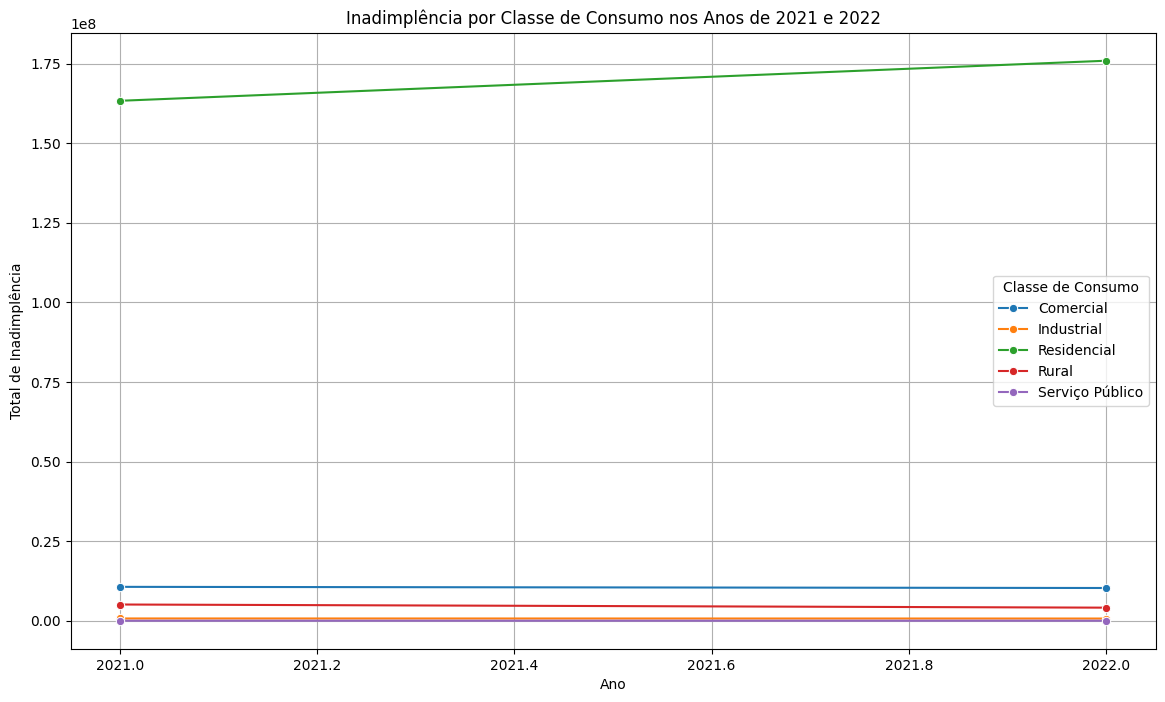

Pergunta 2: Qual é a correlação entre inadimplência e indicadores econômicos?
Gráfico de Correlação entre Inadimplência e Taxa de Desemprego


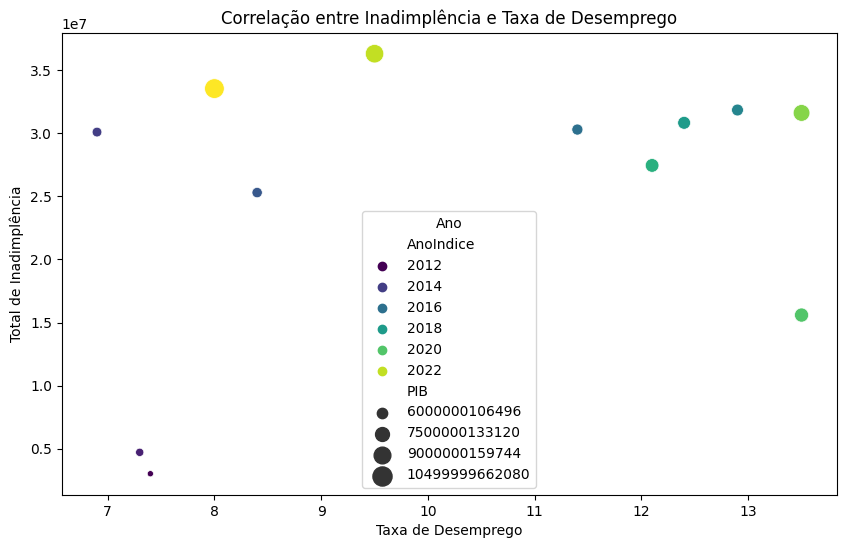

Gráfico de Correlação entre Inadimplência e Inflação


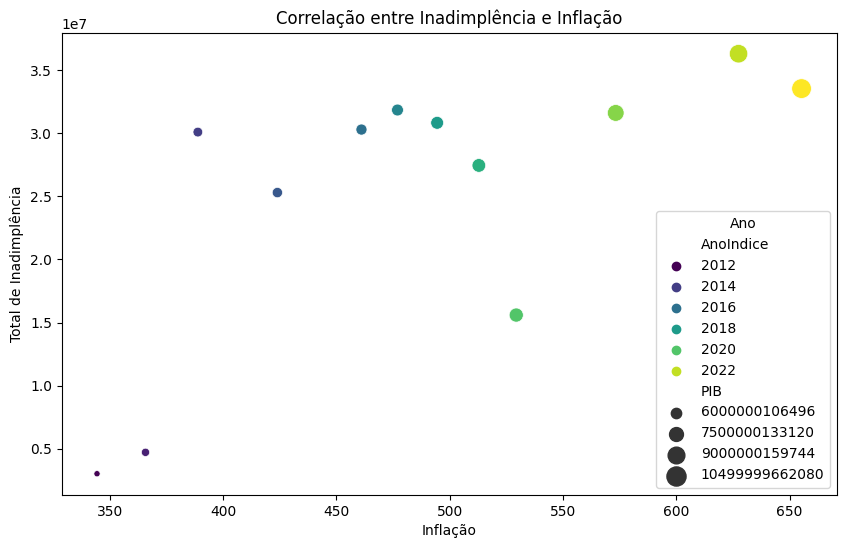

Gráfico de Linhas com a Evolução da Taxa de Desemprego e Inflação


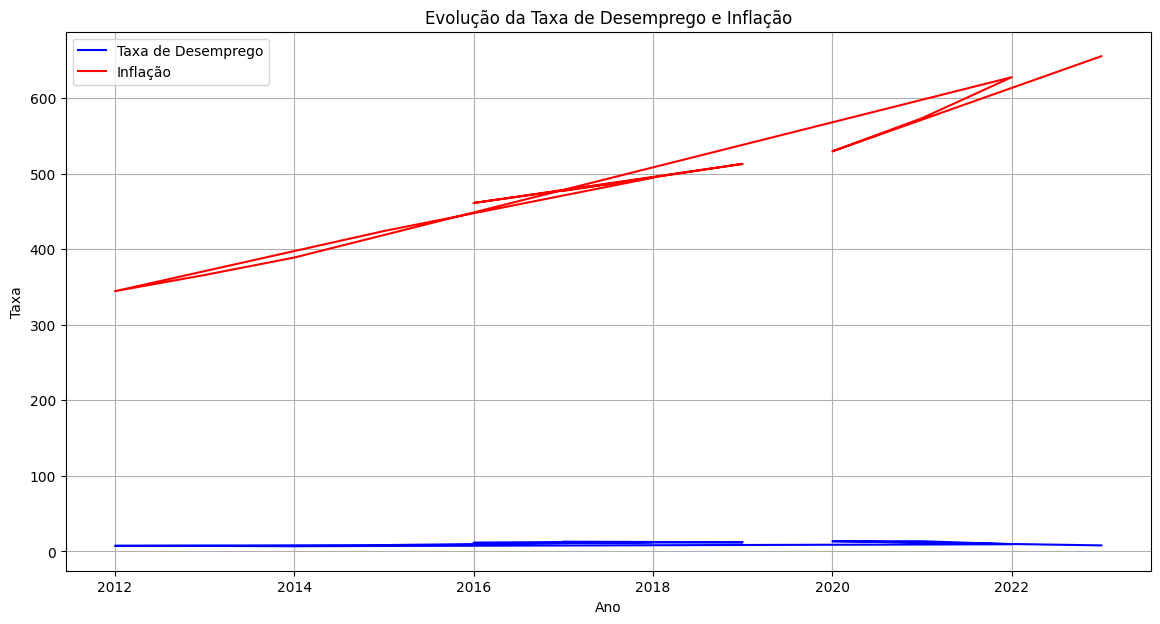

Pergunta 3: Qual é a tendência geral da inadimplência ao longo dos anos?
Gráfico de Tendência Geral da Inadimplência


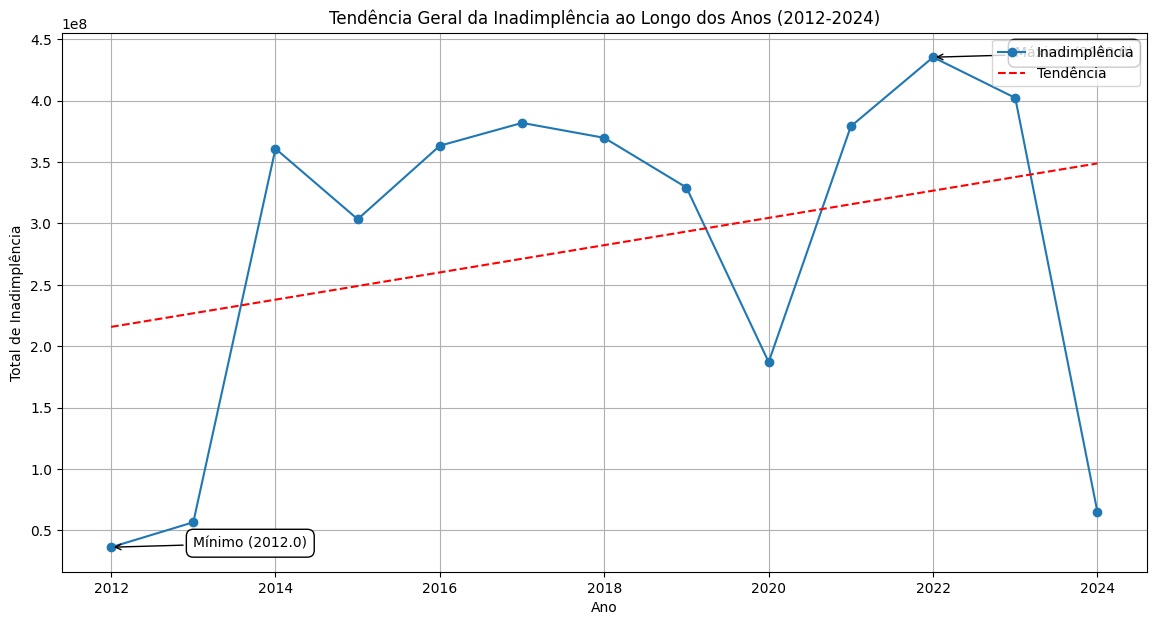

Pergunta 4: A inadimplência apresenta sazonalidades?
Gráfico da sazonalidade da inadimplência


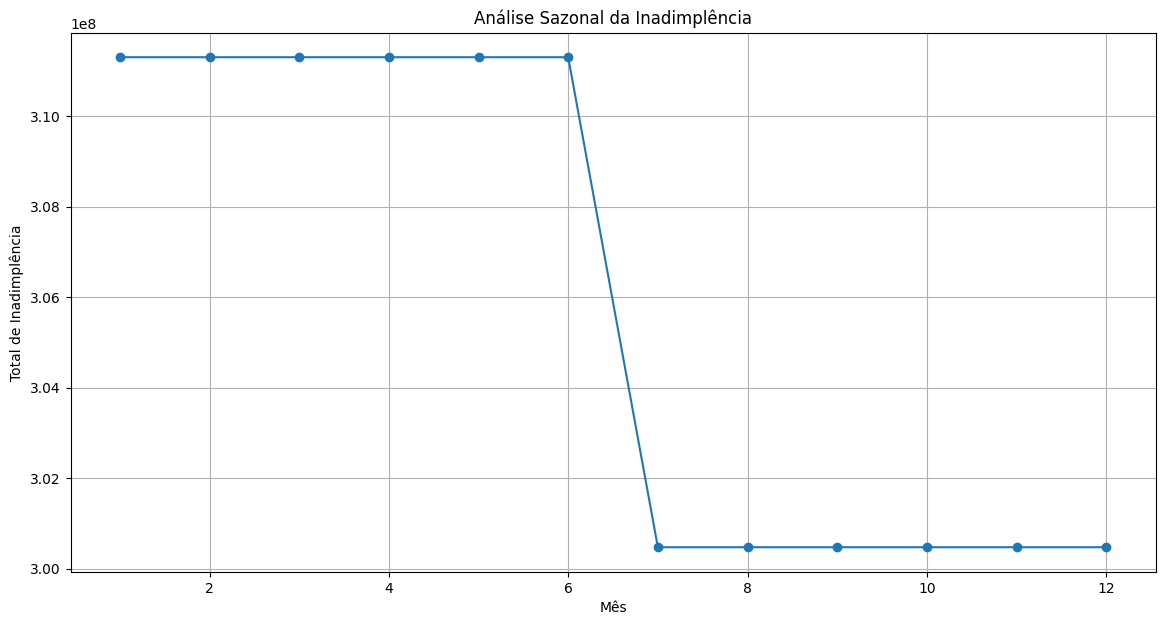

Pergunta 5: Qual a performance das distribuidoras em relação à inadimplência (Top 10 Distribuidoras)?
Gráfico de Performance das Distribuidoras em Relação à Inadimplência (Top 10)


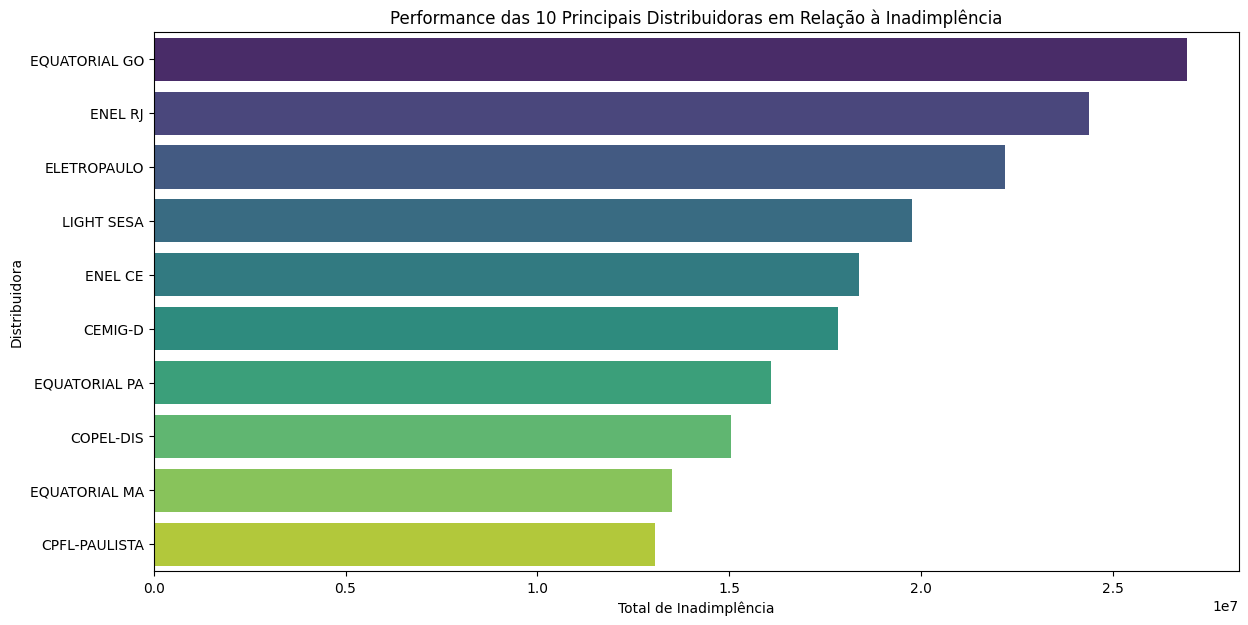

Como a Inadimplência se comportou durante a Pandemia entre (2021-2022)?
Gráfico de Inadimplência durante a Pandemia entre 2021-2022


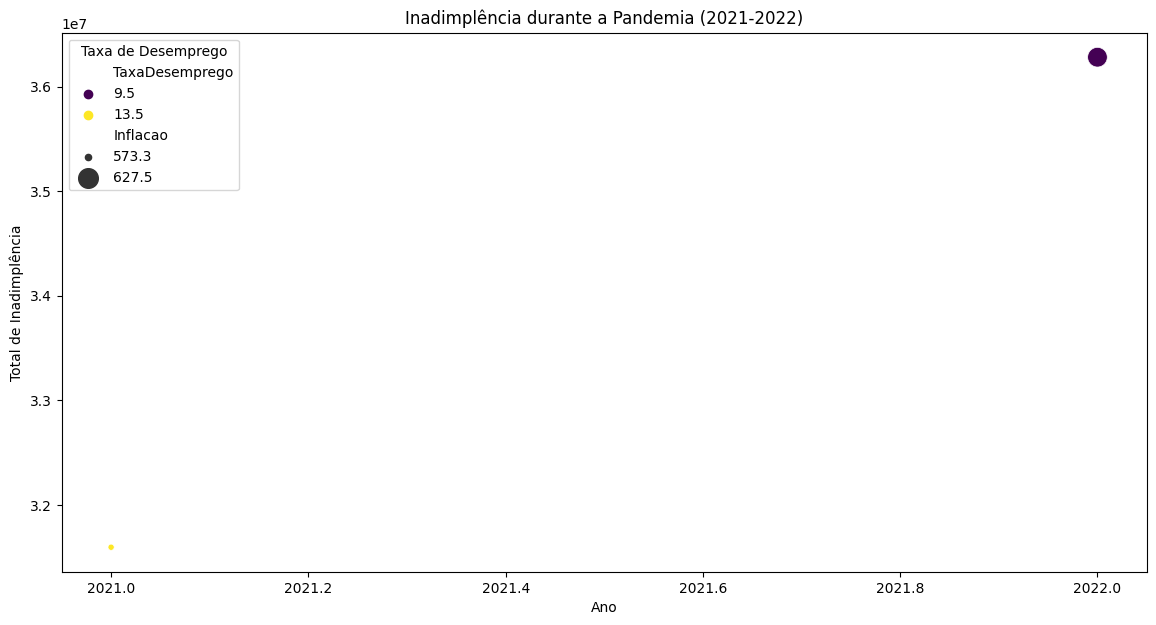

Gráfico de Evolução da Taxa de Desemprego e Inflação durante a Pandemia


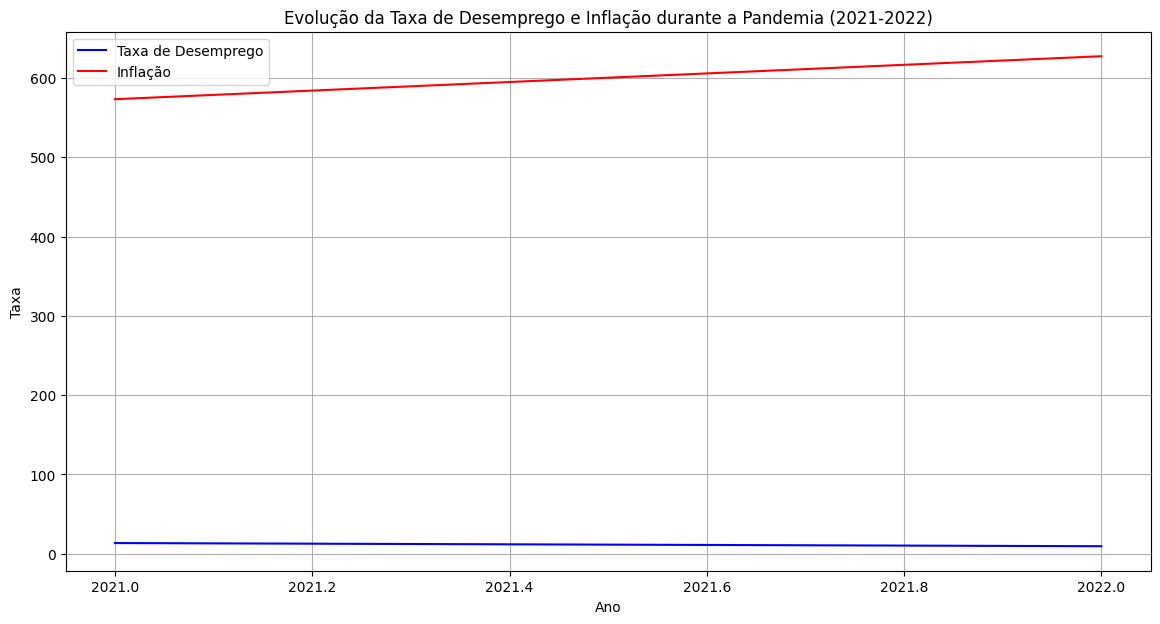

Análise concluída. Verifique os gráficos para entender a correlação entre inadimplência, taxa de desemprego e inflação ao longo dos anos.


In [0]:
# Databricks notebook source
# DBTITLE 1,Importação de Bibliotecas

import matplotlib
matplotlib.use('Agg')  # Definir o backend antes de importar pyplot
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
import seaborn as sns
import numpy as np

# DBTITLE 1,Criação da SparkSession
spark = SparkSession.builder.appName("ConsultasSQL").getOrCreate()

# DBTITLE 1,Carregar Tabelas Gold
fact_inadimplencia = spark.read.format('parquet').load('dbfs:/mnt/Aneel/Gold/fact_inadimplencia')
fact_economicos = spark.read.format('parquet').load('dbfs:/mnt/Aneel/Gold/fact_economicos')
dim_tempo = spark.read.format('parquet').load('dbfs:/mnt/Aneel/Gold/dim_tempo')

# DBTITLE 1,Criar Visões Temporárias
fact_inadimplencia.createOrReplaceTempView('fact_inadimplencia')
fact_economicos.createOrReplaceTempView('fact_economicos')
dim_tempo.createOrReplaceTempView('dim_tempo')

# DBTITLE 1,Pergunta 1: Como a inadimplência varia por classe de consumo nos anos de 2021 e 2022?

result_df_comercial_pandemia = spark.sql("""
SELECT dt.Ano, SUM(fi.VlrIndiceEnviado) AS TotalInadimplenciaComercial
FROM fact_inadimplencia fi
JOIN dim_tempo dt ON fi.AnoIndice = dt.Ano
WHERE fi.SigIndicador = 'IComCrt' AND fi.AnoIndice IN (2021, 2022)
GROUP BY dt.Ano
ORDER BY dt.Ano
""").toPandas()

result_df_industrial_pandemia = spark.sql("""
SELECT dt.Ano, SUM(fi.VlrIndiceEnviado) AS TotalInadimplenciaIndustrial
FROM fact_inadimplencia fi
JOIN dim_tempo dt ON fi.AnoIndice = dt.Ano
WHERE fi.SigIndicador = 'IIndCrt' AND fi.AnoIndice IN (2021, 2022)
GROUP BY dt.Ano
ORDER BY dt.Ano
""").toPandas()

result_df_residencial_pandemia = spark.sql("""
SELECT dt.Ano, SUM(fi.VlrIndiceEnviado) AS TotalInadimplenciaResidencial
FROM fact_inadimplencia fi
JOIN dim_tempo dt ON fi.AnoIndice = dt.Ano
WHERE fi.SigIndicador = 'IResTotCrt' AND fi.AnoIndice IN (2021, 2022)
GROUP BY dt.Ano
ORDER BY dt.Ano
""").toPandas()

result_df_rural_pandemia = spark.sql("""
SELECT dt.Ano, SUM(fi.VlrIndiceEnviado) AS TotalInadimplenciaRural
FROM fact_inadimplencia fi
JOIN dim_tempo dt ON fi.AnoIndice = dt.Ano
WHERE fi.SigIndicador = 'IRurCrt' AND fi.AnoIndice IN (2021, 2022)
GROUP BY dt.Ano
ORDER BY dt.Ano
""").toPandas()

result_df_servico_publico_pandemia = spark.sql("""
SELECT dt.Ano, SUM(fi.VlrIndiceEnviado) AS TotalInadimplenciaServicoPublico
FROM fact_inadimplencia fi
JOIN dim_tempo dt ON fi.AnoIndice = dt.Ano
WHERE fi.SigIndicador = 'ISerPubCrt' AND fi.AnoIndice IN (2021, 2022)
GROUP BY dt.Ano
ORDER BY dt.Ano
""").toPandas()

# Gráficos
print("Pergunta 1: Como a inadimplência varia por classe de consumo nos anos de 2021 e 2022?")
plt.figure(figsize=(14, 8))
sns.lineplot(data=result_df_comercial_pandemia, x='Ano', y='TotalInadimplenciaComercial', marker='o', label='Comercial')
sns.lineplot(data=result_df_industrial_pandemia, x='Ano', y='TotalInadimplenciaIndustrial', marker='o', label='Industrial')
sns.lineplot(data=result_df_residencial_pandemia, x='Ano', y='TotalInadimplenciaResidencial', marker='o', label='Residencial')
sns.lineplot(data=result_df_rural_pandemia, x='Ano', y='TotalInadimplenciaRural', marker='o', label='Rural')
sns.lineplot(data=result_df_servico_publico_pandemia, x='Ano', y='TotalInadimplenciaServicoPublico', marker='o', label='Serviço Público')

plt.title('Inadimplência por Classe de Consumo nos Anos de 2021 e 2022')
plt.xlabel('Ano')
plt.ylabel('Total de Inadimplência')
plt.legend(title='Classe de Consumo')
plt.grid(True)
display(plt.gcf())


# DBTITLE 1,Pergunta 2: Qual é a correlação entre inadimplência e indicadores econômicos?
result_df3 = spark.sql("""
SELECT fi.AnoIndice, SUM(fi.VlrIndiceEnviado) AS TotalInadimplencia, fe.TaxaDesemprego, fe.Inflacao, fe.PIB
FROM fact_inadimplencia fi
JOIN fact_economicos fe ON fi.AnoIndice = fe.AnoIndice
GROUP BY fi.AnoIndice, fe.TaxaDesemprego, fe.Inflacao, fe.PIB
""").toPandas()

print("Pergunta 2: Qual é a correlação entre inadimplência e indicadores econômicos?")
# Gráfico de Correlação entre Inadimplência e Taxa de Desemprego
print("Gráfico de Correlação entre Inadimplência e Taxa de Desemprego")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=result_df3, x='TaxaDesemprego', y='TotalInadimplencia', hue='AnoIndice', palette='viridis', size='PIB', sizes=(20, 200))
plt.title('Correlação entre Inadimplência e Taxa de Desemprego')
plt.xlabel('Taxa de Desemprego')
plt.ylabel('Total de Inadimplência')
plt.legend(title='Ano')
display(plt.gcf())


# Gráfico de Correlação entre Inadimplência e Inflação
print("Gráfico de Correlação entre Inadimplência e Inflação")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=result_df3, x='Inflacao', y='TotalInadimplencia', hue='AnoIndice', palette='viridis', size='PIB', sizes=(20, 200))
plt.title('Correlação entre Inadimplência e Inflação')
plt.xlabel('Inflação')
plt.ylabel('Total de Inadimplência')
plt.legend(title='Ano')
display(plt.gcf())

# Gráfico de Linhas com a Evolução da Taxa de Desemprego e Inflação
print("Gráfico de Linhas com a Evolução da Taxa de Desemprego e Inflação")
plt.figure(figsize=(14, 7))
plt.plot(result_df3['AnoIndice'], result_df3['TaxaDesemprego'], label='Taxa de Desemprego', color='b')
plt.plot(result_df3['AnoIndice'], result_df3['Inflacao'], label='Inflação', color='r')
plt.xlabel('Ano')
plt.ylabel('Taxa')
plt.title('Evolução da Taxa de Desemprego e Inflação')
plt.legend()
plt.grid(True)
display(plt.gcf())


# DBTITLE 1,Pergunta 3: Qual é a tendência geral da inadimplência ao longo dos anos?
result_df_tendencia = spark.sql("""
SELECT dt.Ano, SUM(fi.VlrIndiceEnviado) AS TotalInadimplencia
FROM fact_inadimplencia fi
JOIN dim_tempo dt ON fi.AnoIndice = dt.Ano
WHERE dt.Ano BETWEEN 2012 AND 2024
GROUP BY dt.Ano
ORDER BY dt.Ano
""").toPandas()

# Adicionar linha de tendência
z = np.polyfit(result_df_tendencia['Ano'], result_df_tendencia['TotalInadimplencia'], 1)
p = np.poly1d(z)

# Gráfico de Tendência Geral da Inadimplência
print("Pergunta 3: Qual é a tendência geral da inadimplência ao longo dos anos?")
print("Gráfico de Tendência Geral da Inadimplência")
plt.figure(figsize=(14, 7))
plt.plot(result_df_tendencia['Ano'], result_df_tendencia['TotalInadimplencia'], marker='o', label='Inadimplência')
plt.plot(result_df_tendencia['Ano'], p(result_df_tendencia['Ano']), linestyle='--', color='r', label='Tendência')

# Adicionar anotações para os anos de maior e menor inadimplência
max_year = result_df_tendencia.loc[result_df_tendencia['TotalInadimplencia'].idxmax()]['Ano']
max_value = result_df_tendencia['TotalInadimplencia'].max()
min_year = result_df_tendencia.loc[result_df_tendencia['TotalInadimplencia'].idxmin()]['Ano']
min_value = result_df_tendencia['TotalInadimplencia'].min()

plt.annotate(f'Máximo ({max_year})', xy=(max_year, max_value), xytext=(max_year+1, max_value+1),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
plt.annotate(f'Mínimo ({min_year})', xy=(min_year, min_value), xytext=(min_year+1, min_value+1),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

plt.xlabel('Ano')
plt.ylabel('Total de Inadimplência')
plt.title('Tendência Geral da Inadimplência ao Longo dos Anos (2012-2024)')
plt.legend()
plt.grid(True)
display(plt.gcf())


# DBTITLE 1,Pergunta 4: A inadimplência apresenta sazonalidades?
result_df_sazonal = spark.sql("""
SELECT dt.Mes, SUM(fi.VlrIndiceEnviado) AS TotalInadimplencia
FROM fact_inadimplencia fi
JOIN dim_tempo dt ON fi.AnoIndice = dt.Ano
GROUP BY dt.Mes
ORDER BY dt.Mes
""").toPandas()
print("Pergunta 4: A inadimplência apresenta sazonalidades?")
print("Gráfico da sazonalidade da inadimplência")
# Gráfico de Análise Sazonal da Inadimplência
plt.figure(figsize=(14, 7))
plt.plot(result_df_sazonal['Mes'], result_df_sazonal['TotalInadimplencia'], marker='o')
plt.xlabel('Mês')
plt.ylabel('Total de Inadimplência')
plt.title('Análise Sazonal da Inadimplência')
plt.grid(True)
display(plt.gcf())


# DBTITLE 1,Pergunta 5: Qual a performance das distribuidoras em relação à inadimplência (Top 10 Distribuidoras)?
result_df_performance = spark.sql("""
SELECT fi.SigAgente, SUM(fi.VlrIndiceEnviado) AS TotalInadimplencia
FROM fact_inadimplencia fi
GROUP BY fi.SigAgente
ORDER BY TotalInadimplencia DESC
LIMIT 10
""").toPandas()

print("Pergunta 5: Qual a performance das distribuidoras em relação à inadimplência (Top 10 Distribuidoras)?")
print("Gráfico de Performance das Distribuidoras em Relação à Inadimplência (Top 10)")
# Gráfico de Performance das Distribuidoras em Relação à Inadimplência (Top 10)
plt.figure(figsize=(14, 7))
sns.barplot(data=result_df_performance, x='TotalInadimplencia', y='SigAgente', palette='viridis')
plt.xlabel('Total de Inadimplência')
plt.ylabel('Distribuidora')
plt.title('Performance das 10 Principais Distribuidoras em Relação à Inadimplência')
display(plt.gcf())


# DBTITLE 1, Pergunta 6: Como a Inadimplência se comportou durante a Pandemia entre (2021-2022)?
result_df_pandemia = spark.sql("""
SELECT fi.AnoIndice, SUM(fi.VlrIndiceEnviado) AS TotalInadimplencia, fe.TaxaDesemprego, fe.Inflacao
FROM fact_inadimplencia fi
JOIN fact_economicos fe ON fi.AnoIndice = fe.AnoIndice
WHERE fi.AnoIndice IN (2021, 2022)
GROUP BY fi.AnoIndice, fe.TaxaDesemprego, fe.Inflacao
ORDER BY fi.AnoIndice
""").toPandas()
print("Como a Inadimplência se comportou durante a Pandemia entre (2021-2022)?")
# Gráfico de Inadimplência durante a Pandemia entre 2021-2022
print("Gráfico de Inadimplência durante a Pandemia entre 2021-2022")
plt.figure(figsize=(14, 7))
sns.scatterplot(data=result_df_pandemia, x='AnoIndice', y='TotalInadimplencia', hue='TaxaDesemprego', size='Inflacao', palette='viridis', sizes=(20, 200))
plt.xlabel('Ano')
plt.ylabel('Total de Inadimplência')
plt.title('Inadimplência durante a Pandemia (2021-2022)')
plt.legend(title='Taxa de Desemprego')
display(plt.gcf())

print("Gráfico de Evolução da Taxa de Desemprego e Inflação durante a Pandemia")
# Gráfico de Evolução da Taxa de Desemprego e Inflação durante a Pandemia
plt.figure(figsize=(14, 7))
plt.plot(result_df_pandemia['AnoIndice'], result_df_pandemia['TaxaDesemprego'], label='Taxa de Desemprego', color='b')
plt.plot(result_df_pandemia['AnoIndice'], result_df_pandemia['Inflacao'], label='Inflação', color='r')
plt.xlabel('Ano')
plt.ylabel('Taxa')
plt.title('Evolução da Taxa de Desemprego e Inflação durante a Pandemia (2021-2022)')
plt.legend()
plt.grid(True)
display(plt.gcf())


# DBTITLE 1,Conclusão: Análise de Inadimplência e Indicadores Econômicos
print("Análise concluída. Verifique os gráficos para entender a correlação entre inadimplência, taxa de desemprego e inflação ao longo dos anos.")

